# Spring 2023 ME395: Deep Learning Discrete Calculus (DLDC) for Engineering Applications
# Lecture 3.1 Interpolation 1

Instructors: \
> Prof. Wing Kam Liu, w-liu@northwestern.edu \

Guest lecturers: \
> Prof.Mark Fleming \
> Dr. Abdullah Al Amin \

> 
Graders: \
> Sourav Saha \
> Jiachen Guo \
> Chanwook Park, chanwookpark2024@u.northwestern.edu \

Let us think of a sin function.

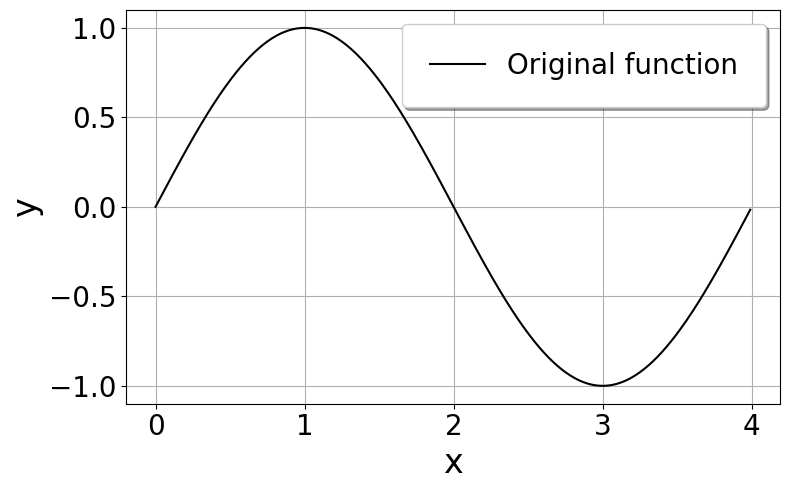

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Get x y values of the sine wave
x = np.arange(0, 4, 0.01)
y = np.sin(np.pi/2*x)

# plot x, y
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x, y, '-', markersize=5, color='black', label='Original function')    
ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.grid()
fig.tight_layout()

Take 9 discrete data points with a uniform spacing of 0.5.

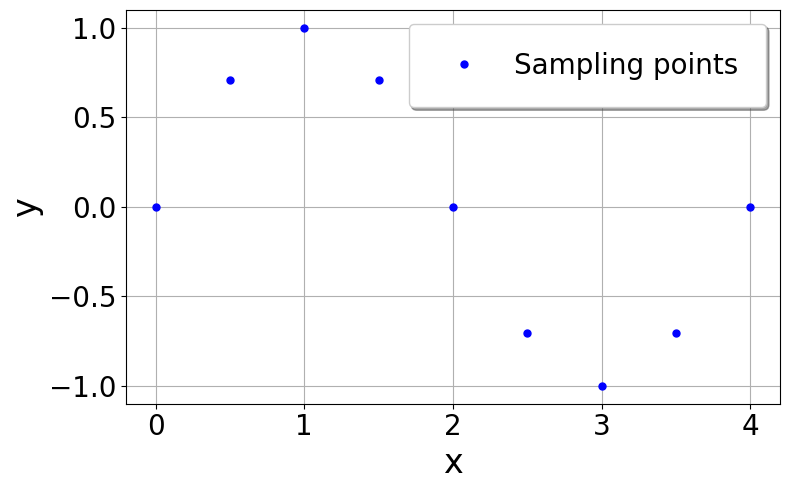

In [2]:
# Get x y values of the sine wave
x_sample = np.arange(0, 4.1, 0.5)
y_sample = np.sin(np.pi/2*x_sample)

# plot x, y
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_sample, y_sample, 'o', markersize=5, color='blue', label='Sampling points')    
ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.grid()
fig.tight_layout()

Below is a graph for visualization.

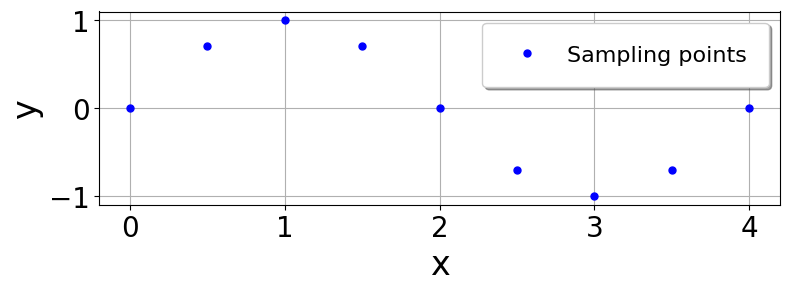

In [4]:
# Get x y values of the sine wave
x_sample = np.arange(0, 4.1, 0.5)
y_sample = np.sin(np.pi/2*x_sample)

# plot x, y
fig, ax = plt.subplots(figsize = (8,3))
line, = ax.plot(x_sample, y_sample, 'o', markersize=5, color='blue', label='Sampling points')    
ax.legend(shadow=True, borderpad=1, fontsize=16, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.grid()
fig.tight_layout()

Below is a graph for visualization.

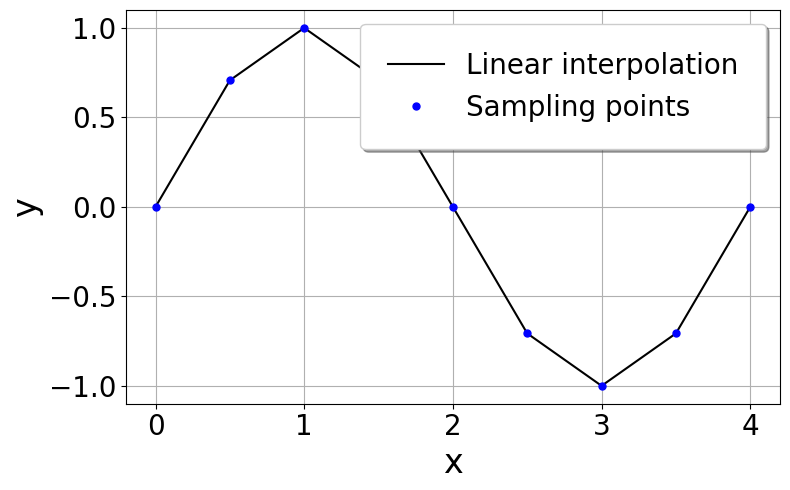

In [5]:
# Get x y values of the sine wave
x_sample = np.arange(0, 4.1, 0.5);
y_sample = np.sin(np.pi/2*x_sample)

# plot x, y
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_sample, y_sample, '-', markersize=5, color='black', label='Linear interpolation')
line, = ax.plot(x_sample, y_sample, 'o', markersize=5, color='blue', label='Sampling points')    
ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.grid()
fig.tight_layout()



Below is a graph for visualization.

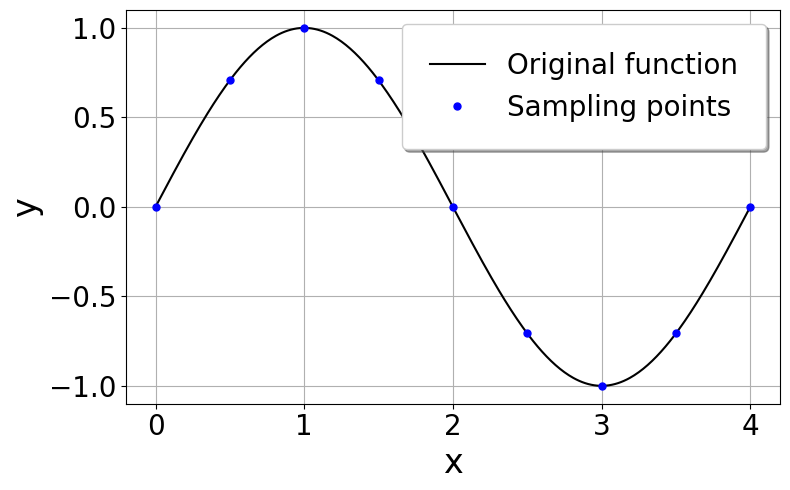

In [6]:
# Get x y values of the sine wave
x_sample = np.arange(0, 4.1, 0.5);
y_sample = np.sin(np.pi/2*x_sample)

# plot x, y
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x, y, '-', markersize=5, color='black', label='Original function')
line, = ax.plot(x_sample, y_sample, 'o', markersize=5, color='blue', label='Sampling points')    
ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.grid()
fig.tight_layout()


## DLDC for linear interpolation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Get x y values of the sine wave
x_sample = np.arange(0, 4.1, 0.5)
y_sample = np.sin(np.pi/2*x_sample)
print(x_sample)
print(y_sample)


[0.000 0.500 1.000 1.500 2.000 2.500 3.000 3.500 4.000]
[0.000 0.707 1.000 0.707 0.000 -0.707 -1.000 -0.707 -0.000]


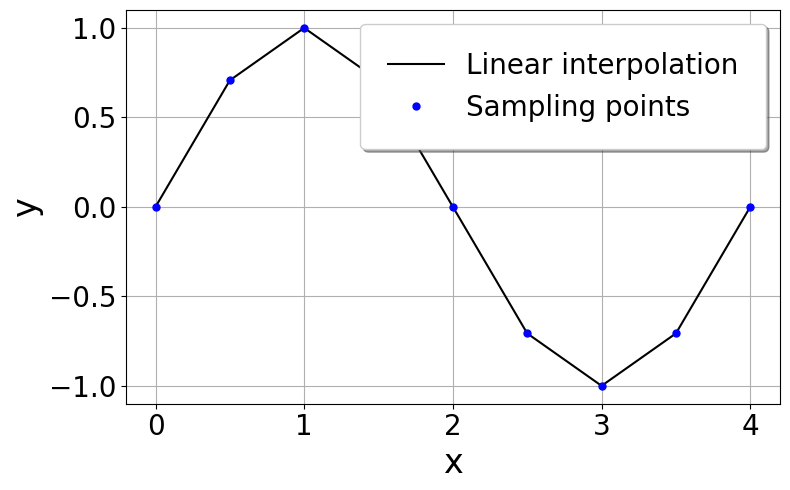

In [8]:
# define filter
def linear_filter(x, x_data, y_data):
  ''' 
  --inputs--
  x: x point of interest, a scalar value
  x_data: a set of x data points, a vector of length 2
  y_data: a set of y data points, a vector of length 2
  -- outputs --
  filter: linear interpolation filter, a vector of length 2
  '''
  filter = np.array([(x_data[1]-x)/(x_data[1]-x_data[0]), (x-x_data[0])/(x_data[1]-x_data[0])])
  return filter

x_intp = [] # interpolated x
y_intp = [] # interpolated y
for irange in range(len(x_sample)-1):
  x_data = x_sample[irange:irange+2]
  y_data = y_sample[irange:irange+2]
  
  x_range = np.linspace(x_data[0], x_data[1], 11)
  for x in x_range:
    filter = linear_filter(x, x_data, y_data) # filtering
    y = np.dot(filter, y_data) # multiplication + accumulation
    x_intp.append(x)
    y_intp.append(y)


# plot x, y
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_intp, y_intp, '-', markersize=5, color='black', label='Linear interpolation')
line, = ax.plot(x_sample, y_sample, 'o', markersize=5, color='blue', label='Sampling points')    
ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.grid()
fig.tight_layout()

## Kernel (convolution-based) interpolation


ref: https://zipcpu.com/dsp/2018/01/16/interpolation-is-convolution.html

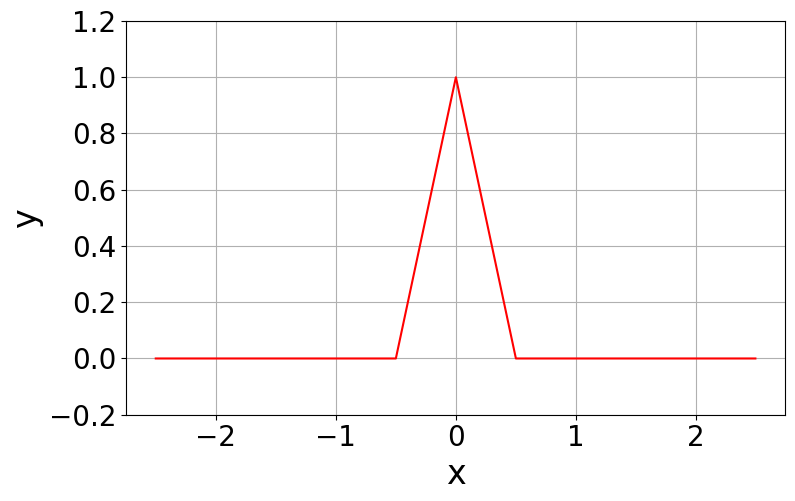

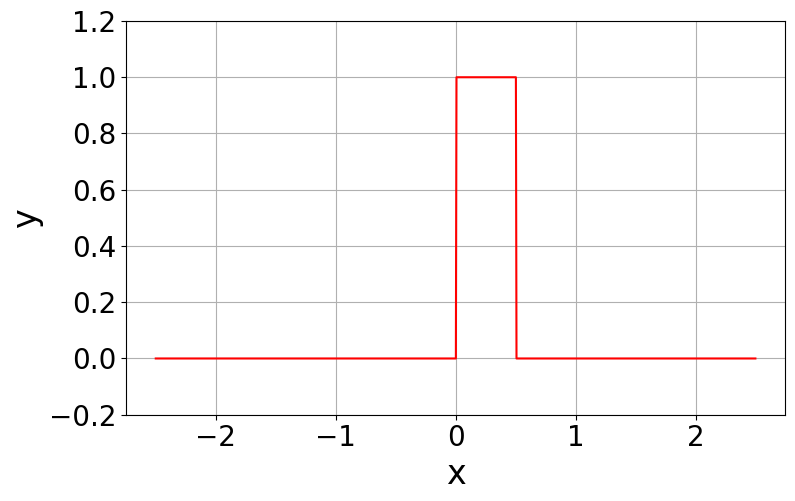

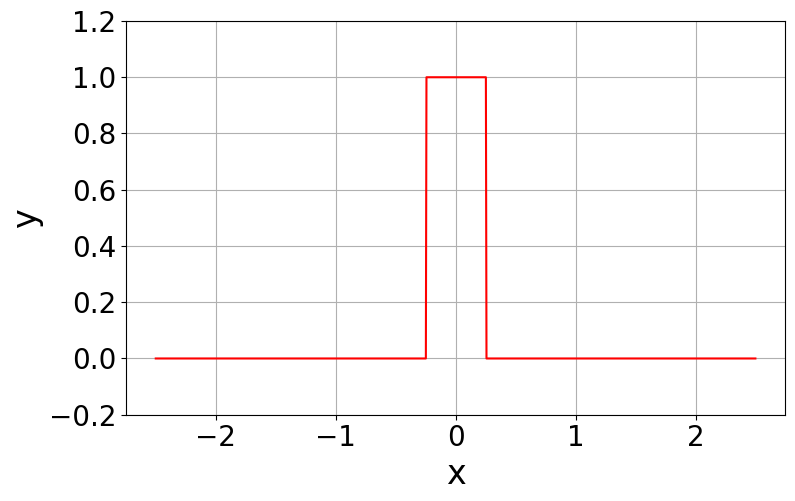

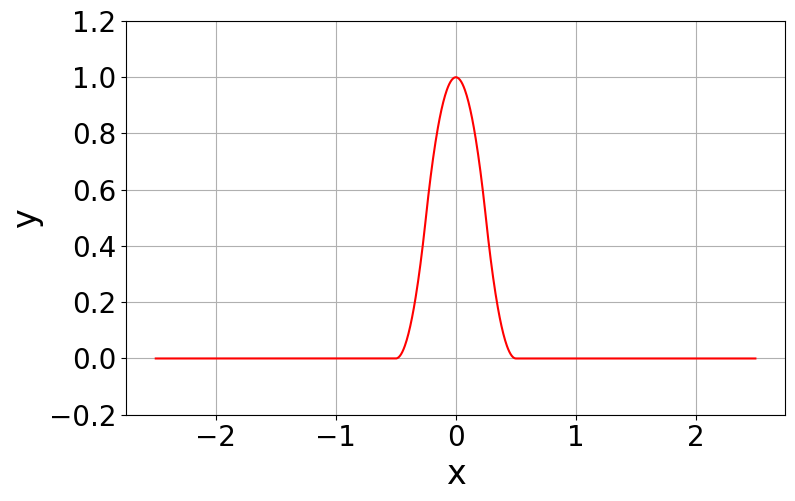

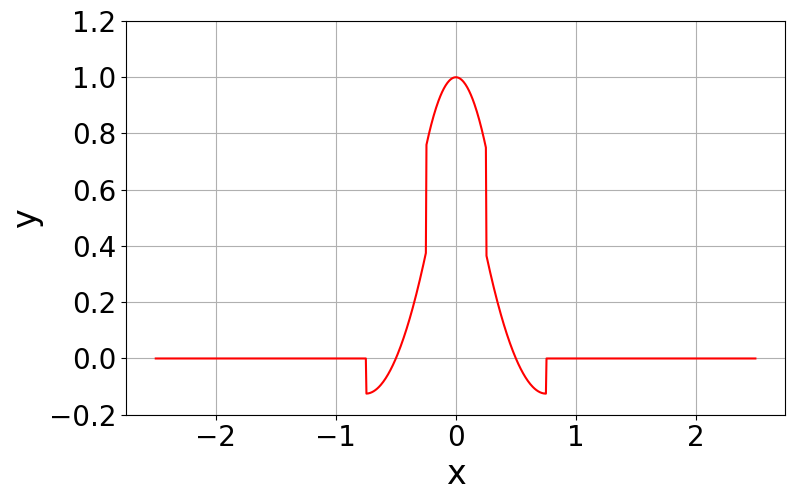

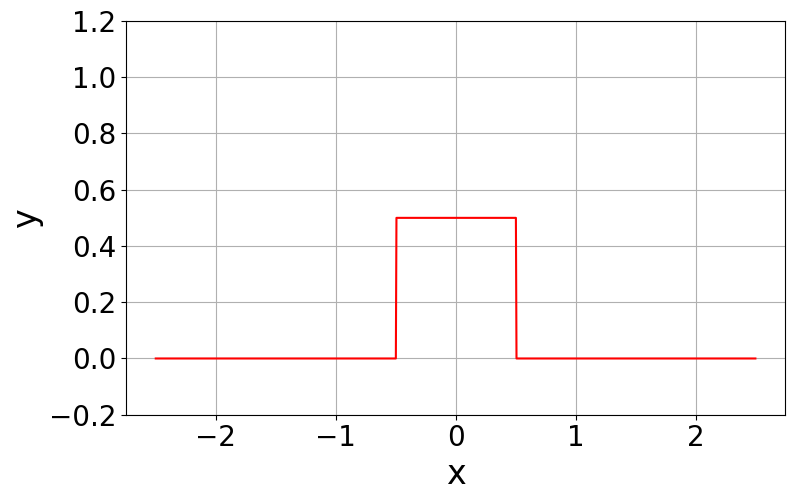

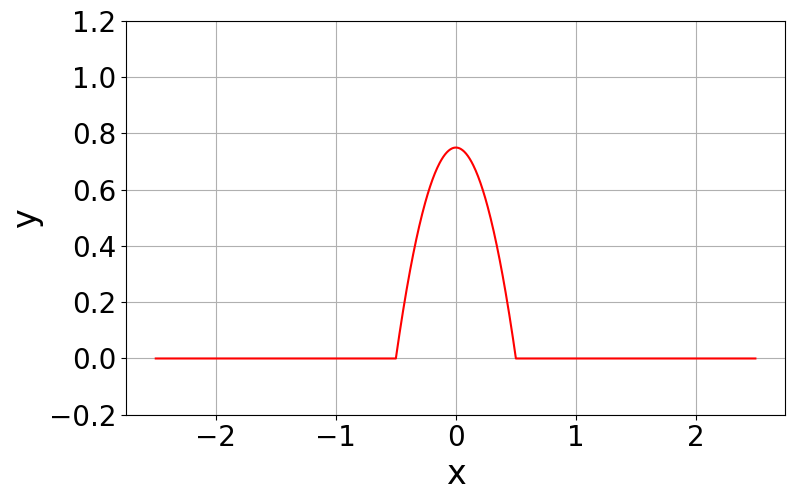

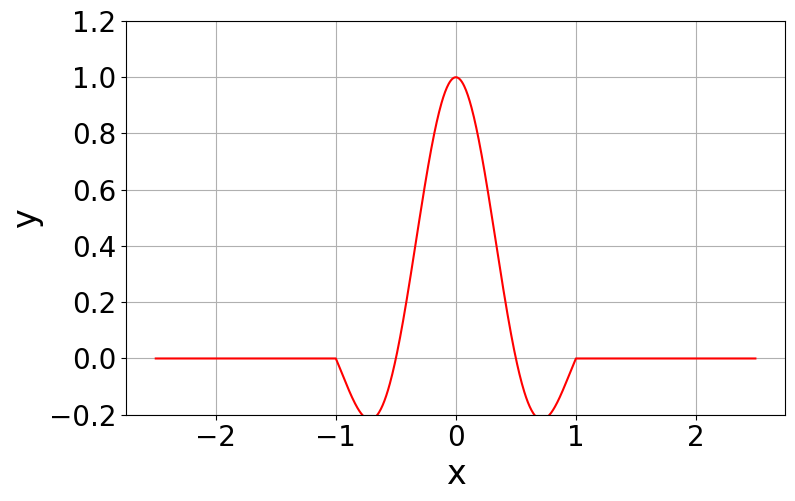

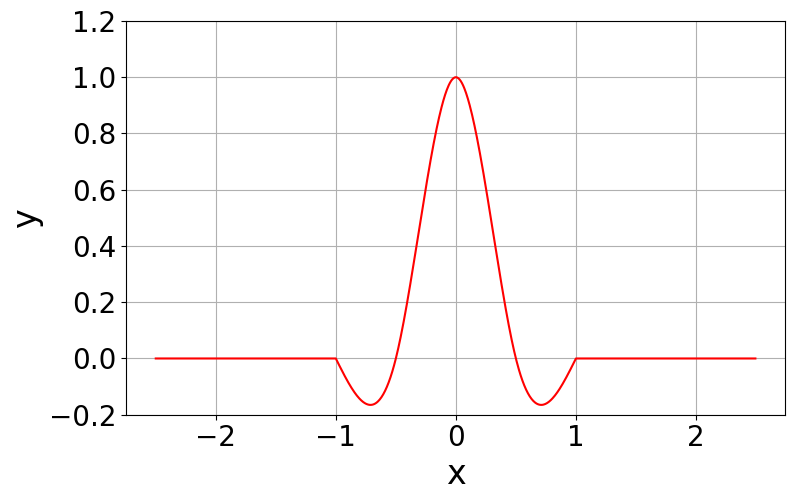

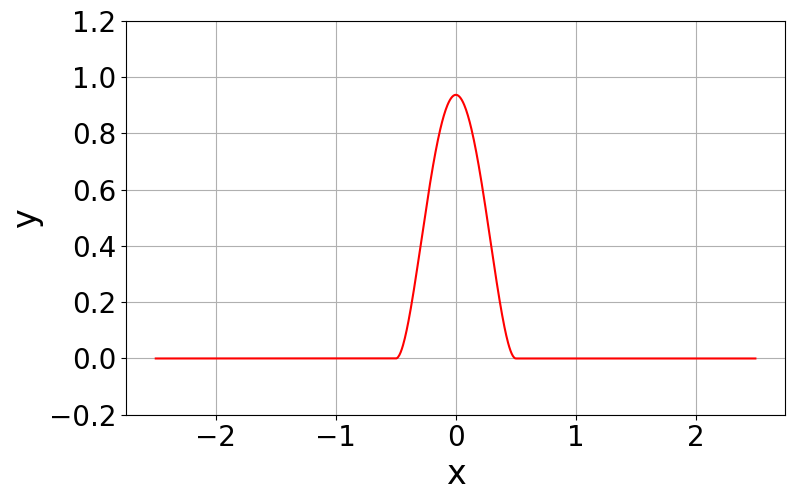

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def SampleAndHold(x, dx):
  x_n = x / dx # normalize x 
  if 0 <= x_n and x_n < 1:
    kernel = 1
  else:
    kernel = 0
  return kernel
  
def NearestNeighbor(x, dx):
  x_n = x / dx # normalize x 
  if -1/2 <= x_n < 1/2:
    kernel = 1
  else:
    kernel = 0
  return kernel


def Linear(x, dx):
  x_n = x / dx # normalize x 
  if np.abs(x_n) < 1:
    kernel = 1 - np.abs(x_n)
  else:
    kernel = 0
  return kernel

def Quadratic(x, dx):
  x_n = x / dx # normalize x 
  if np.abs(x_n) <= 0.5:
    kernel = 1-2*x_n**2
  elif -1 < x_n < -0.5:
    kernel = 2*(x_n+1)**2
  elif 0.5 < x_n < 1:
    kernel = 2*(x_n-1)**2
  else:
    kernel = 0
  return kernel

def QuadraticFit(x, dx):
  x_n = x / dx # normalize x 
  if -3/2 <= x_n < -1/2:
    kernel = 1/2*x_n**2 + 3/2*x_n + 1
  elif -1/2 <= x_n < 1/2:
    kernel = 1 - x_n**2
  elif 1/2 <= x_n < 3/2:
    kernel = 1/2*x_n**2 - 3/2*x_n + 1
  else:
    kernel = 0
  return kernel

def Uniform(x, dx):
  x_n = x / dx # normalize x 
  if np.abs(x_n) <= 1:
    kernel = 0.5
  else:
    kernel = 0
  return kernel

def Parabolic(x, dx):
  x_n = x / dx # normalize x 
  if np.abs(x_n) <= 1:
    kernel = 3/4 * (1-x_n**2)
  else:
    kernel = 0
  return kernel

def Sinc(x, dx):
  x_n = x / dx # normalize x 
  if np.abs(x_n) < 2:
    kernel = np.sin(np.pi*x_n)/(np.pi*x_n)
  else:
    kernel = 0
  return kernel

def CubicSpline(x, dx):
  x_n = x / dx # normalize x 
  if np.abs(x_n) < 1:
    kernel = 1.1429*np.abs(x_n)**3 - 2.1429*x_n**2 + 1
  elif np.abs(x_n) < 2:
    kernel = -0.42857*np.abs(x_n)**3 + 2.5714*x_n**2 - 4.7143* np.abs(x_n) + 2.5714
  else:
    kernel = 0
  return kernel

def Quartic(x, dx):
  x_n = x / dx # normalize x 
  if np.abs(x_n) <= 1:
    kernel = 15/16 * (1-x_n**2)**2
  else:
    kernel = 0
  return kernel

def PlotKernel(kernel_fn, dx):
  # plot Kernel
  x_space = np.arange(-2.5, 2.5, 0.005)
  y_space = np.zeros_like(x_space)

  for idx, xii in enumerate(x_space):
    y_space[idx] = kernel_fn(xii, dx)
  
  fig, ax = plt.subplots(figsize = (8,5))
  line, = ax.plot(x_space, y_space,  markersize=5, color='red')
  ax.axes.tick_params(labelsize=20)
  ax.set_xlabel("x", fontsize=24)
  ax.set_ylabel("y", fontsize=24)
  ax.set_ylim([-0.2,1.2])
  ax.grid()
  fig.tight_layout()

dx = 0.5
PlotKernel(Linear, dx)
PlotKernel(SampleAndHold, dx)
PlotKernel(NearestNeighbor, dx)
PlotKernel(Quadratic, dx)
PlotKernel(QuadraticFit, dx)
PlotKernel(Uniform, dx)
PlotKernel(Parabolic, dx)
PlotKernel(Sinc, dx)
PlotKernel(CubicSpline, dx)
PlotKernel(Quartic, dx)

C:\Users\kleme\AppData\Local\Temp\ipykernel_13964\1080166085.py:72: RuntimeWarning: invalid value encountered in scalar divide
  kernel = np.sin(np.pi*x_n)/(np.pi*x_n)


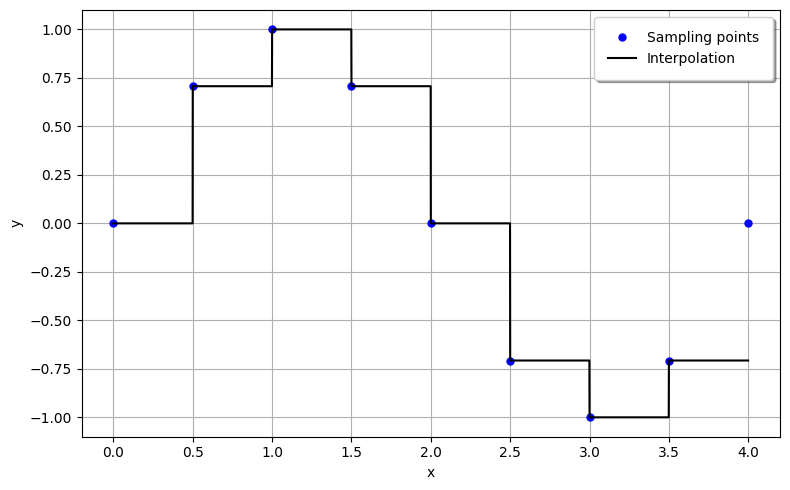

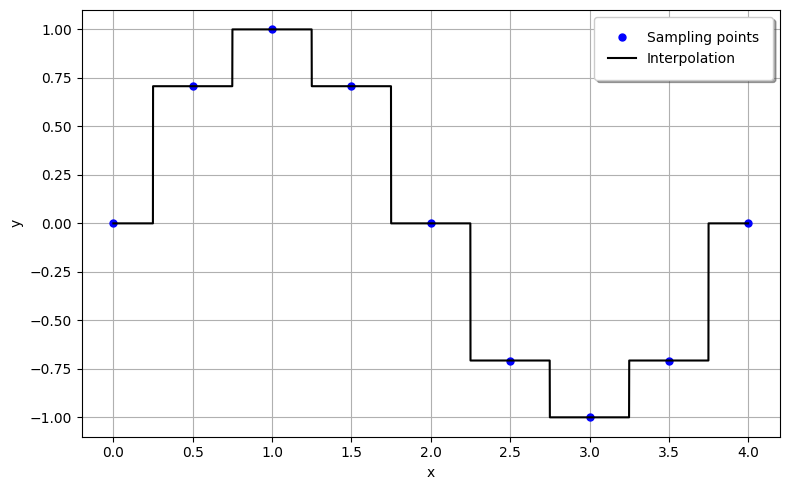

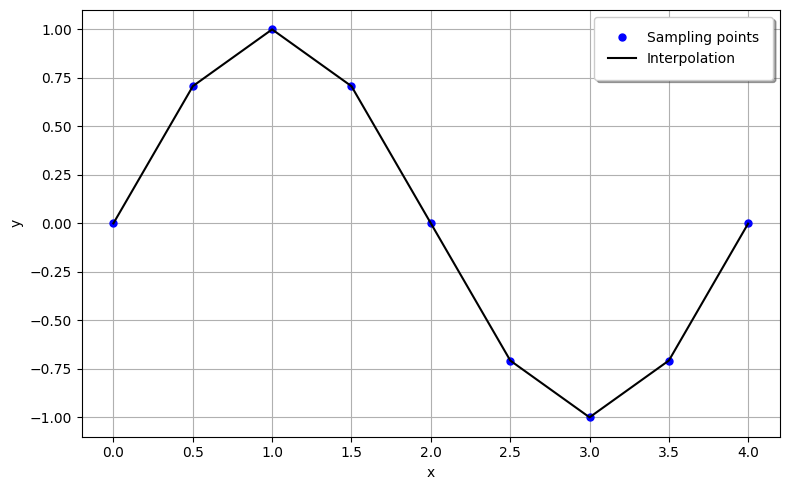

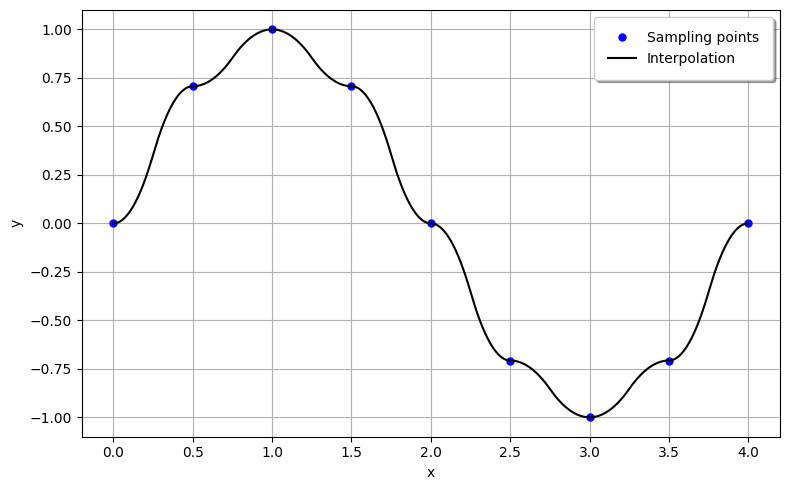

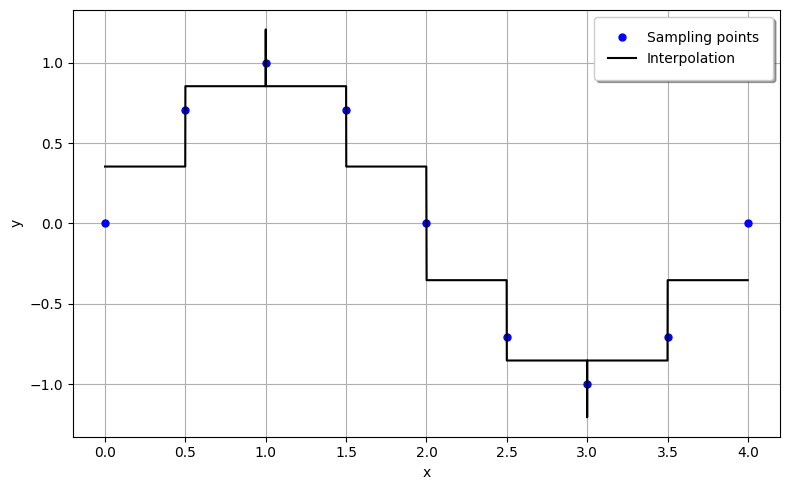

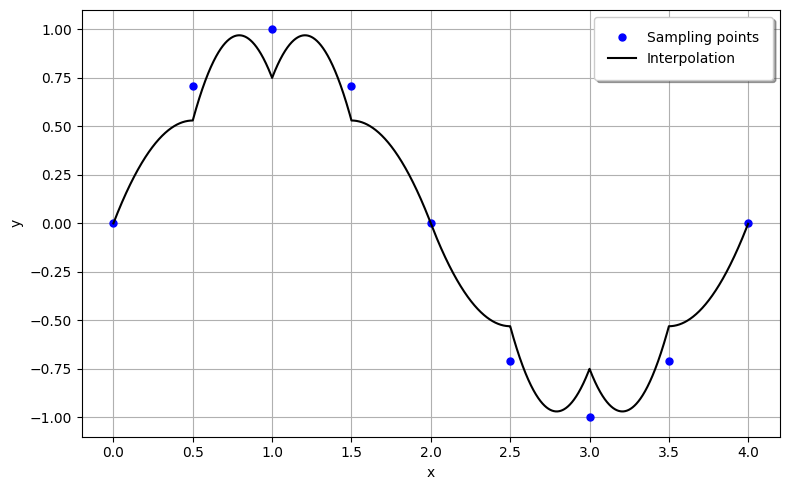

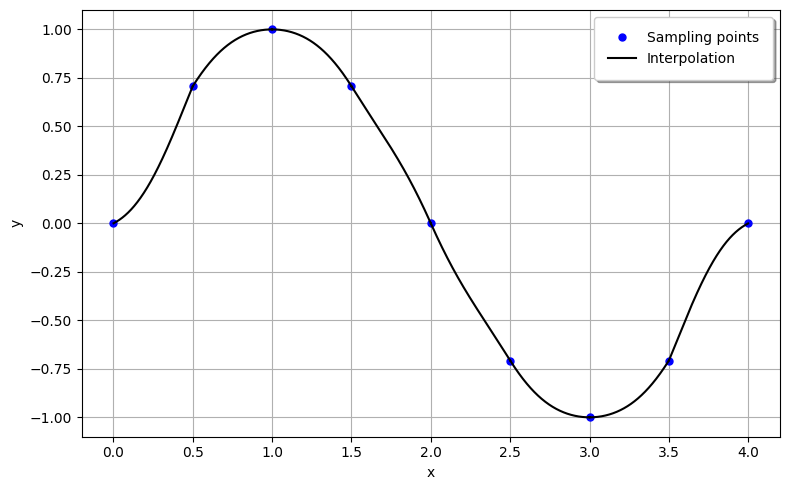

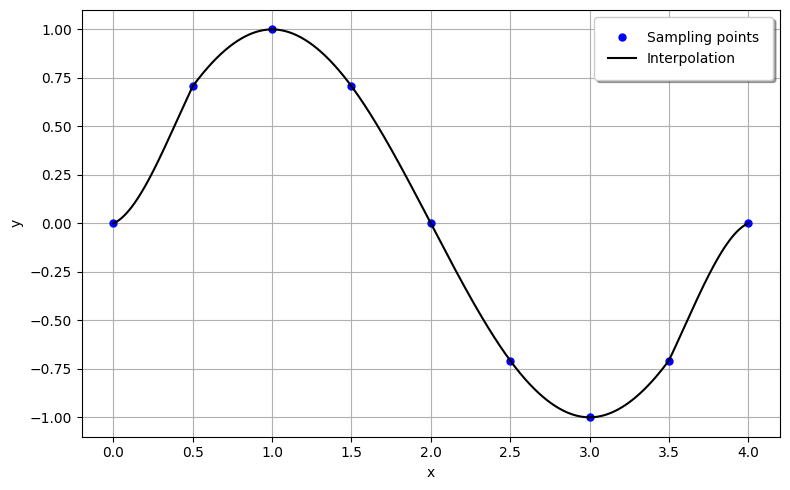

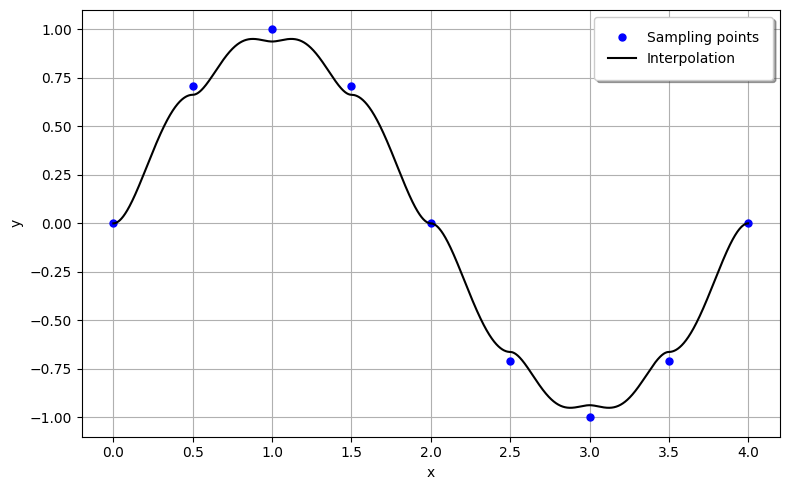

In [49]:
def ConvolutionInterpolation(x, kernel_fn, dx, y_sample):
  y_sum = 0
  for idx, yi in enumerate(y_sample):
    y_sum += yi * kernel_fn(x - idx*dx, dx)
  return y_sum

def PlotInterpolation(x_sample, y_sample, kernel_fn, dx):
  # plot Kernel
  x_space = np.arange(0, 4.0, 0.001)
  y_space = np.zeros_like(x_space)

  for idx, x in enumerate(x_space):
    y_space[idx] = ConvolutionInterpolation(x, kernel_fn, dx, y_sample)
  
  fig, ax = plt.subplots(figsize = (8,5))
  line, = ax.plot(x_sample, y_sample, 'o', markersize=5, color='blue', label='Sampling points')    
  line, = ax.plot(x_space, y_space,  markersize=5, color='black', label='Interpolation')
  ax.legend(shadow=True, borderpad=1, fontsize=10, loc='best')
  ax.axes.tick_params(labelsize=10)
  ax.set_xlabel("x", fontsize=10)
  ax.set_ylabel("y", fontsize=10)
  ax.grid()
  fig.tight_layout()

# Get x y values of the sine wave
x_sample = np.arange(0, 4.1, 0.5);
y_sample = np.sin(np.pi/2*x_sample)

PlotInterpolation(x_sample, y_sample, SampleAndHold, dx)
PlotInterpolation(x_sample, y_sample, NearestNeighbor, dx)
PlotInterpolation(x_sample, y_sample, Linear, dx)
PlotInterpolation(x_sample, y_sample, Quadratic, dx)
PlotInterpolation(x_sample, y_sample, Uniform, dx)
PlotInterpolation(x_sample, y_sample, Parabolic, dx)
PlotInterpolation(x_sample, y_sample, Sinc, dx)
PlotInterpolation(x_sample, y_sample, CubicSpline, dx)
PlotInterpolation(x_sample, y_sample, Quartic, dx)